# Statistical Methods in AI (CSE/ECE 471) - Spring-2020
#  Assignment-2 / **Q5** / Topic: SVM - AuthorClassifier
# Submitted By: VENUGOPAL REDDY MEKA
# Roll No: 2019900065

In [ ]:
# Load the required imports
import matplotlib.pyplot as plt
import seaborn as sns

# use matplotlib inline for Jupyter notebook
%matplotlib inline

import pandas as pd
import numpy as np

In [5]:
import pandas as pd
df = pd.read_csv('./Datasets/Question-5/Train(1).csv')
df = df[["text", "author"]]
df_text = df[["text"]]
df_text.head()


,text
0,The sight of the military restored hope to tho...
1,Just as the building was wiped out by a German...
2,Do you wonder how it will seem?
3,"My revenge is of no moment to you; yet, while ..."
4,"If he dares to reply, you can tell him from Lu..."


In [6]:
df_author = df[["author"]]
df_author.head()

,author
0,MWS
1,HPL
2,HPL
3,MWS
4,EAP


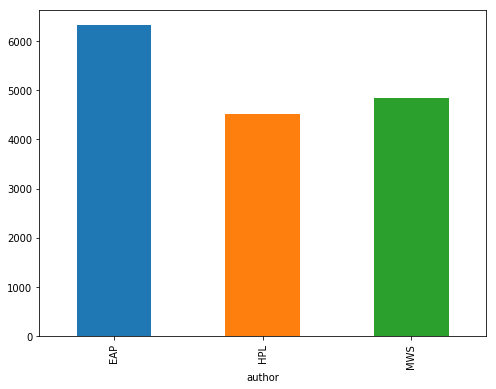

In [7]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df.groupby('author').text.count().plot.bar(ylim=0)
plt.show()

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(df.text).toarray()
labels = df.author
features.shape

(15663, 7388)

In [9]:
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test, indices_train, indices_test = \
    train_test_split(features, labels, df.index, test_size=0.33, random_state=0)


## Linear Kernel

In [10]:
model = LinearSVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [11]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)

[[1707  184  204]
 [ 257 1116  110]
 [ 261  128 1202]]


In [12]:
conf_mat

array([[1707,  184,  204],
       [ 257, 1116,  110],
       [ 261,  128, 1202]], dtype=int64)

In [13]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, target_names=df['author'].unique()))

              precision    recall  f1-score   support

         MWS       0.77      0.81      0.79      2095
         HPL       0.78      0.75      0.77      1483
         EAP       0.79      0.76      0.77      1591

    accuracy                           0.78      5169
   macro avg       0.78      0.77      0.78      5169
weighted avg       0.78      0.78      0.78      5169



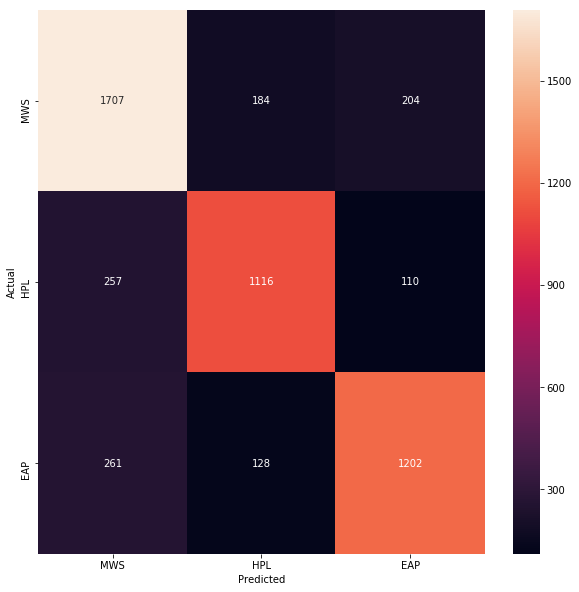

In [14]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=df['author'].unique(), yticklabels=df['author'].unique())
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()